### Задача 1:
---
##### 1.1. Подключение необходимых библиотек и загрузка данных
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv(r'i:\!GeekBrains\Business Intelligence\II четверть Специализация\14 Python для аналитиков\Урок04Семинар\kc-house-data (1).csv')

# Отображение первых 5 строк данных
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
1.2. Изучите стоимости недвижимости.
---

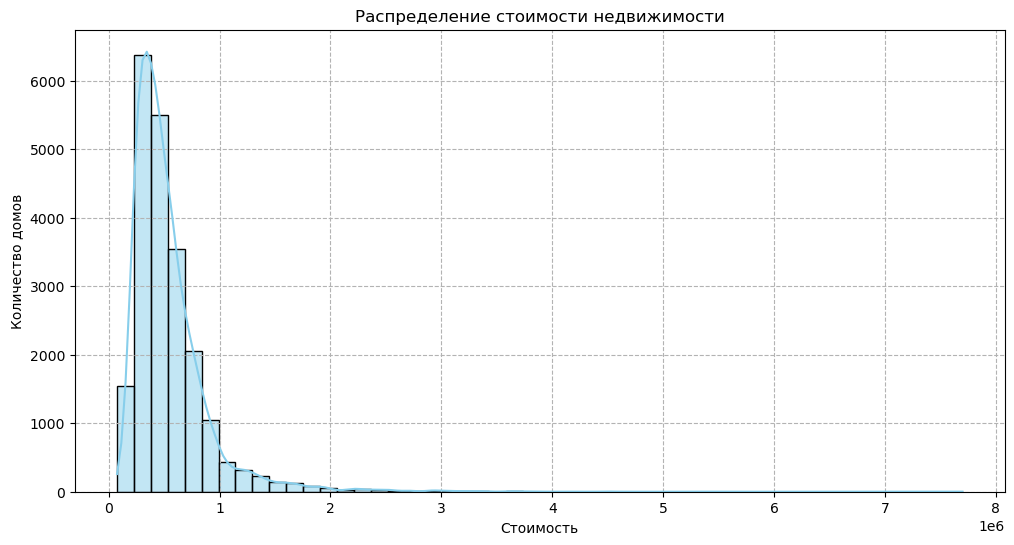

In [2]:
# Построение графика распределения стоимости недвижимости
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='skyblue')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов')
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

**Выводы по анализу стоимости недвижимости:**

Распределение стоимости недвижимости смещено влево. Это означает, что большинство домов имеют относительно низкую стоимость, в то время как немногие дома имеют очень высокую стоимость.
Наибольшая концентрация стоимостей домов находится в диапазоне от 0 до 1,5 млн. долларов, что делает их наиболее типичными для этого рынка.

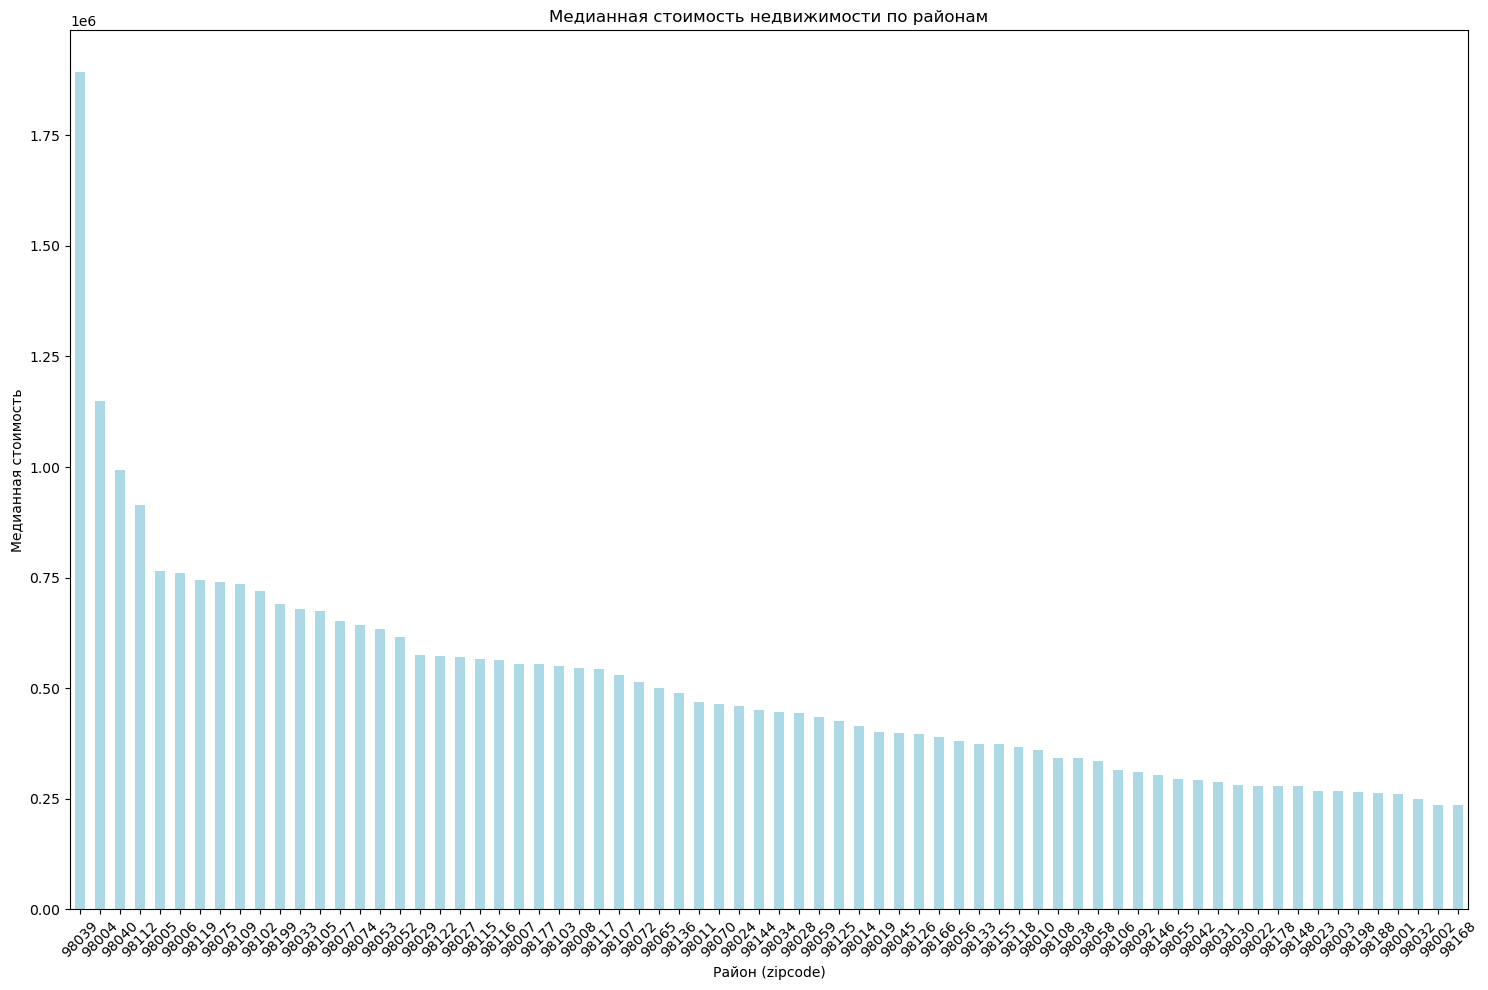

In [3]:
# Группировка данных по районам (zipcode) и расчет медианной стоимости
median_price_by_zipcode = data.groupby('zipcode')['price'].median().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(15, 10))
median_price_by_zipcode.plot(kind='bar', color='lightblue')
plt.title('Медианная стоимость недвижимости по районам')
plt.xlabel('Район (zipcode)')
plt.ylabel('Медианная стоимость')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Выводы по анализу стоимости недвижимости по районам:**

Распределение стоимости недвижимости сильно различается в разных районах.
Некоторые районы имеют значительно более высокую медианную стоимость в сравнении с другими.
Различия в стоимости могут быть обусловлены многими факторами: близостью к центру города, качеством инфраструктуры, красивыми видами и т.д.
При покупке или продаже недвижимости важно учитывать район, так как это может сильно влиять на стоимость

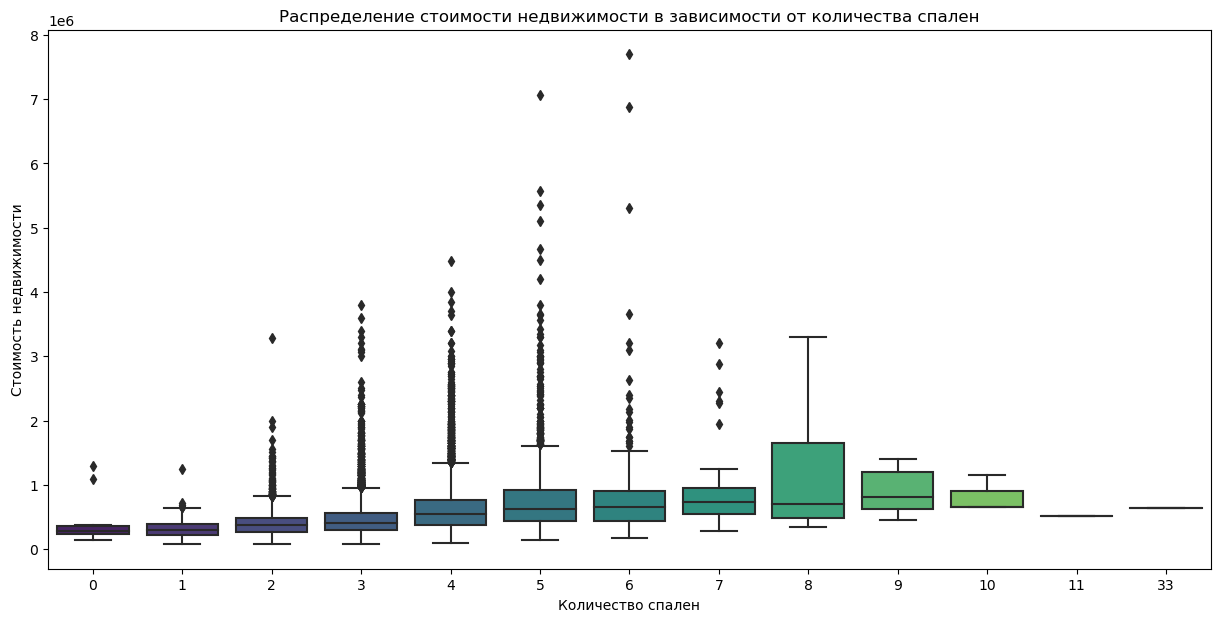

In [4]:
# Построение графика
plt.figure(figsize=(15, 7))
sns.boxplot(x='bedrooms', y='price', data=data, palette='viridis')
plt.title('Распределение стоимости недвижимости в зависимости от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Стоимость недвижимости')
plt.show()


**Выводы по анализу стоимости недвижимости в зависимости от количества спален:**

Как ожидалось, стоимость недвижимости увеличивается с увеличением количества спален. Однако после определенного порога (8 спален) этот тренд нарушается.
Дома с 9 и 10 спальнями имеют меньшую медианную стоимость по сравнению с домами, имеющими 7 или 8 спален. Это может быть связано с тем, что такие большие дома могут находиться в менее привлекательных районах или иметь другие характеристики, уменьшающие их стоимость.
Очень редкие значения, такие как дома с 33 спальнями, могут быть ошибками в данных или аномалиями и требуют дополнительного рассмотрения.

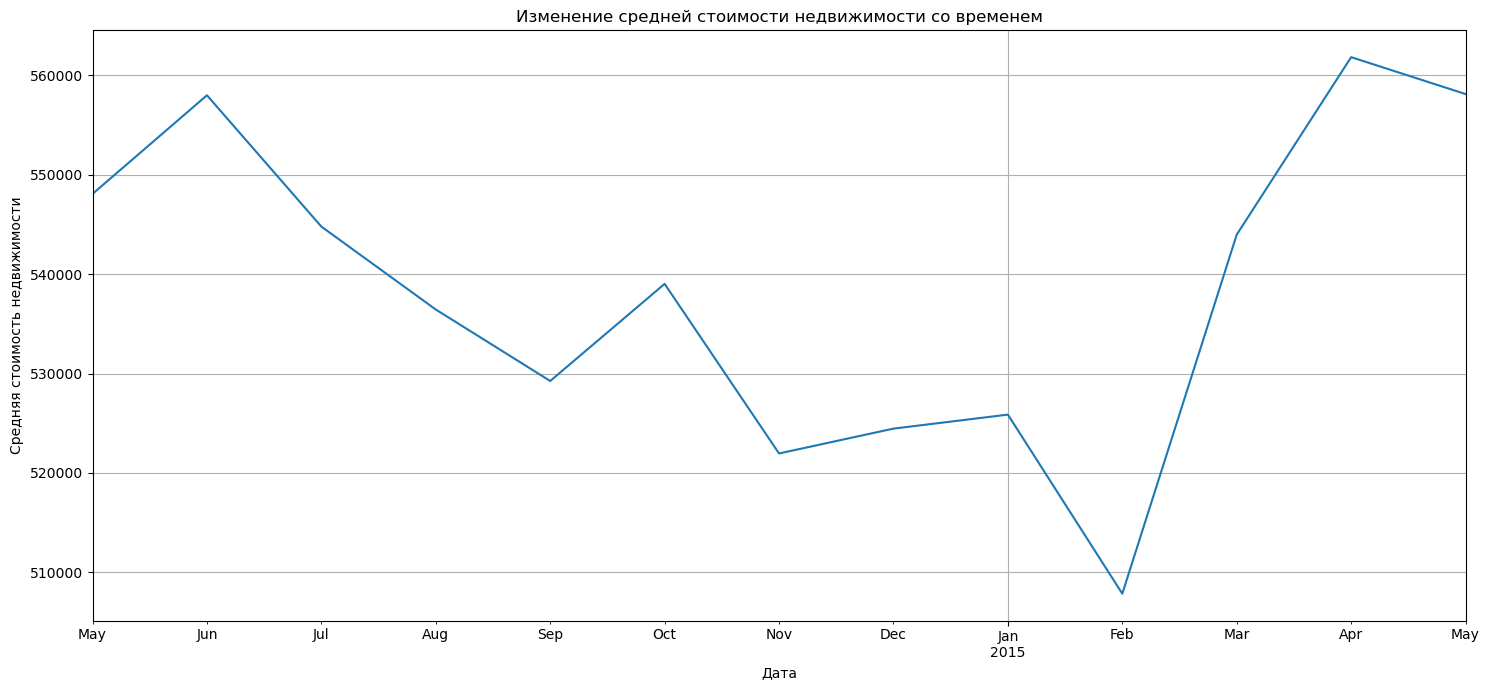

In [5]:
# Преобразование столбца date в формат даты
data['date'] = pd.to_datetime(data['date'])

# Группировка данных по месяцам и расчет средней стоимости недвижимости
monthly_avg_price = data.groupby(data['date'].dt.to_period("M")).mean()['price']

# Построение графика
plt.figure(figsize=(15, 7))
monthly_avg_price.plot()
plt.title('Изменение средней стоимости недвижимости со временем')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость недвижимости')
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод по временным трендам изменеия средней стоимости:**
    
На графике представлено изменение средней стоимости недвижимости по месяцам. Несмотря на то, что у нас есть данные только за два года (2014 и 2015), можно выделить несколько наблюдений:

Сезонные колебания: Есть некоторые признаки сезонных колебаний в стоимости недвижимости. Цены, кажется, немного падают в начале года и достигают пика к середине года (летом).
Восходящий тренд: В 2015 году средние цены выше, чем в 2014 году. Это указывает на возможный восходящий тренд в стоимости недвижимости в рассматриваемом районе.
Стабильность цен: В целом цены на недвижимость в рассматриваемом районе кажутся относительно стабильными без резких колебаний.

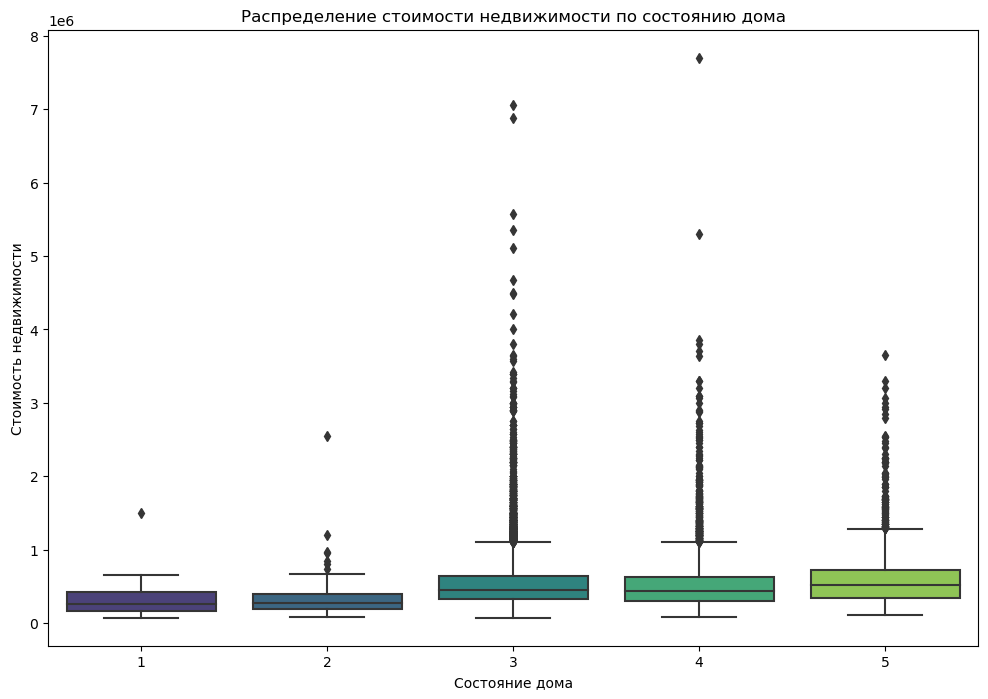

In [6]:
# Создание boxplot для распределения стоимости недвижимости по состоянию дома
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['condition'], y=data['price'], palette='viridis')
plt.title('Распределение стоимости недвижимости по состоянию дома')
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость недвижимости')
plt.show()

**Выводы по распределению стоимости недвижимости в зависимости от состояния дома:**
    
Недвижимость с состоянием "3" и "4" имеет самое высокое медианное значение цены. Это может быть связано с тем, что большинство домов на рынке имеют это состояние, и они, вероятно, представляют средний сегмент рынка.
Дома с состоянием "1" и "2" имеют более низкую медианную стоимость по сравнению с другими категориями, что, вероятно, свидетельствует о том, что эти дома требуют капитального ремонта.
Недвижимость с состоянием "5" имеет более широкий размах цен, что указывает на большее разнообразие домов в этой категории. Однако медианная стоимость домов в этой категории ниже, чем у домов с состоянием "3" и "4".
Наличие выбросов в каждой из категорий состояния указывает на наличие домов с особо высокой или особо низкой стоимостью.

### 1.3. Изучите распределение квадратуры жилой недвижимости.


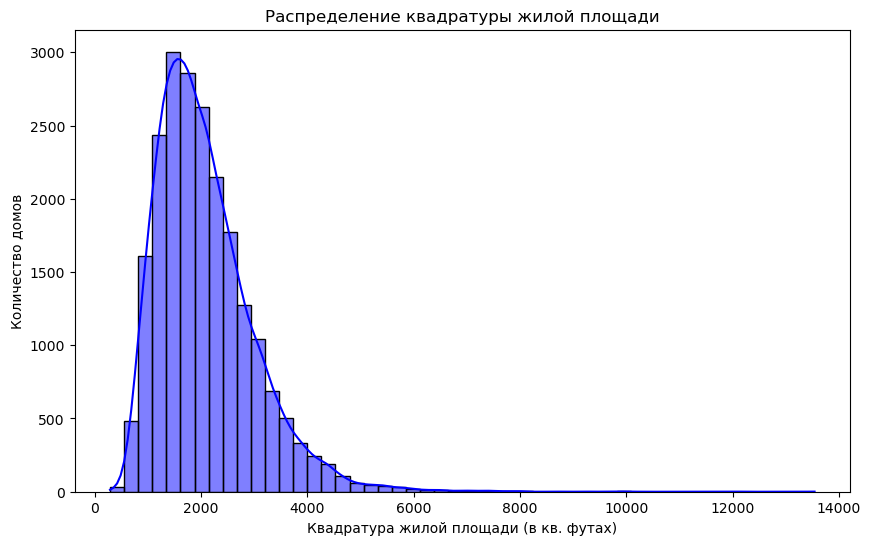

In [7]:
# Основное распределение квадратуры жилой площади
plt.figure(figsize=(10,6))
sns.histplot(data['sqft_living'], bins=50, kde=True, color='blue')
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади (в кв. футах)')
plt.ylabel('Количество домов')
plt.show()

**Гистограмма распределения квадратуры:**

Большая часть домов имеет жилую площадь в диапазоне от 1000 до 3000 квадратных футов.
Распределение квадратуры жилой площади смещено влево, что указывает на то, что большинство домов имеют среднюю и ниже среднего площадь, в то время как дома с большой площадью встречаются реже.
Есть несколько домов с площадью более 10 000 квадратных футов, которые можно считать выбросами или редкими экземплярами на рынке.

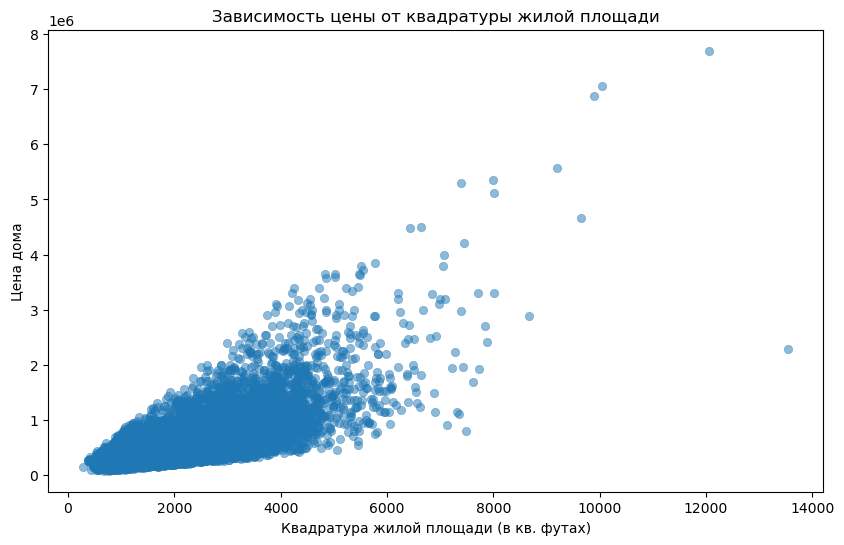

In [8]:
# Совмещенный график с распределением квадратуры и ценой дома
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=data, alpha=0.5, edgecolor=None)
plt.title('Зависимость цены от квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади (в кв. футах)')
plt.ylabel('Цена дома')
plt.show()

**Совмещенный график с распределением квадратуры и ценой дома:**

Явно видна положительная корреляция между жилой площадью и ценой дома: большая площадь обычно соответствует более высокой стоимости.
В то же время для домов с одинаковой площадью может существовать большой разброс в ценах, что указывает на влияние других факторов на стоимость дома.
С увеличением площади дома разброс цен становится шире. Это может быть связано с тем, что большие дома чаще имеют уникальные характеристики, которые могут сильно влиять на их стоимость.

<Figure size 1200x700 with 0 Axes>

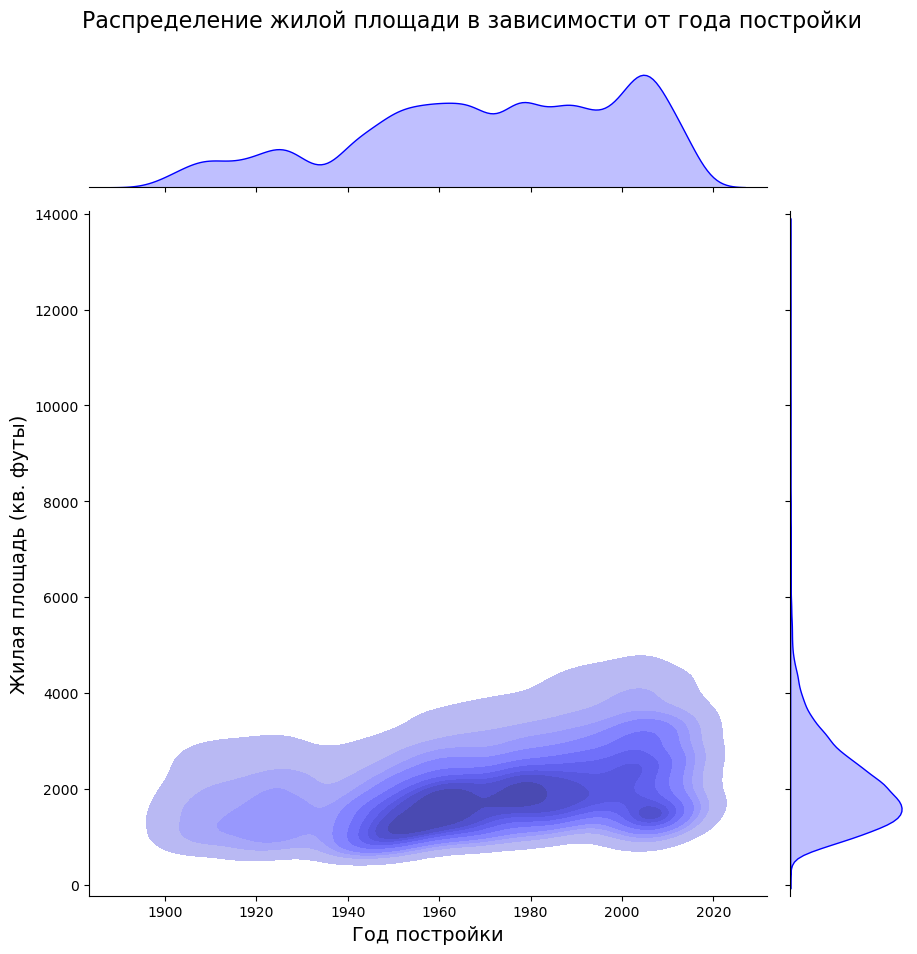

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предварительная обработка даты (если необходимо)
data['date'] = pd.to_datetime(data['date'])

# Установка размера графика
plt.figure(figsize=(12, 7))

# Создание совмещенного графика с KDE
sns.jointplot(x=data['yr_built'], y=data['sqft_living'], kind="kde", height=9, color='blue', fill=True)

# Настройка заголовка и осей
plt.suptitle('Распределение жилой площади в зависимости от года постройки', fontsize=16, y=1.05)
plt.xlabel('Год постройки', fontsize=14)
plt.ylabel('Жилая площадь (кв. футы)', fontsize=14)

# Показ графика
plt.show()


**Выводы:**
    
Плотность распределения: Большая часть домов, построенных в начале 20-го века, имели жилую площадь, располагающуюся в диапазоне от 1000 до 2500 квадратных футов.

Тренд в середине 20-го века: Примерно с 1940 по 1980 годы можно заметить увеличение числа домов с площадью более 3000 квадратных футов. Это может указывать на рост популярности больших домов или на развитие строительных технологий, позволяющих строить более просторные дома.

Современные дома: Дома, построенные после 1980 года, часто имеют площадь от 1500 до 4000 квадратных футов. Однако видно, что пиковая плотность (самое темное место на графике) смещается к большему значению площади по сравнению с домами старой постройки.

Общий тренд: С течением времени жилая площадь домов, по-видимому, увеличивается. Это может быть связано с ростом благосостояния населения, изменением стандартов жизни или предпочтений в стиле жилья.

Теперь предоставлю вам код для Jupyter Notebook.

 #### 1.4. Изучите распределение года постройки

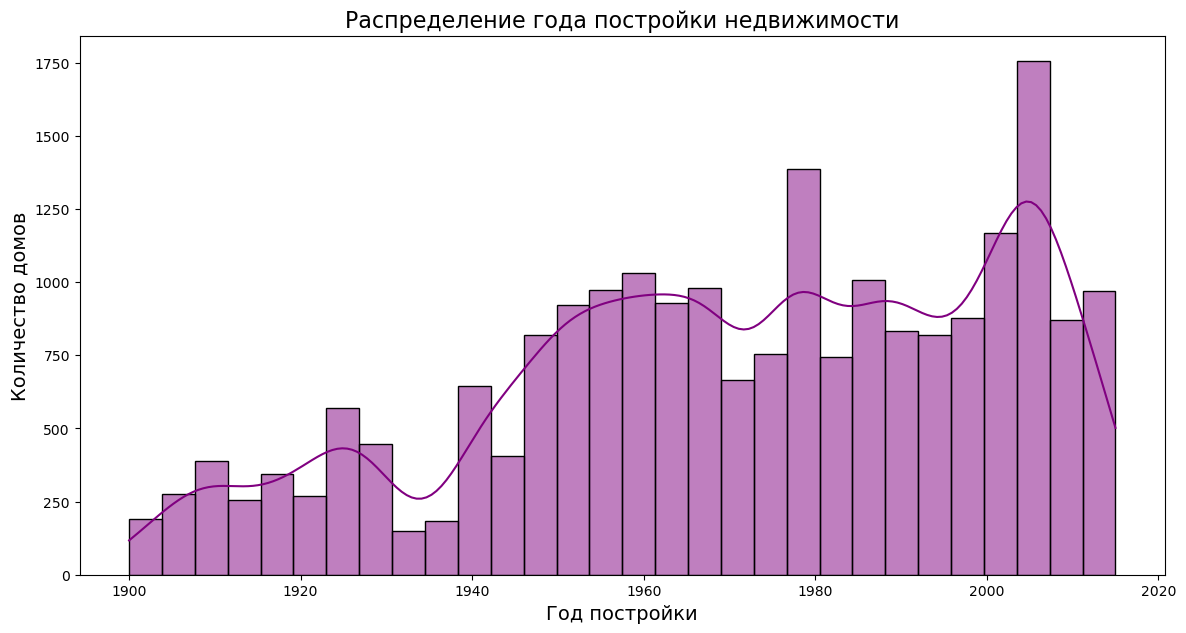

In [11]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Установка размера графика
plt.figure(figsize=(14, 7))

# Построение графика распределения года постройки
sns.histplot(data['yr_built'], bins=30, color='purple', kde=True)

# Настройка заголовка и осей
plt.title('Распределение года постройки недвижимости', fontsize=16)
plt.xlabel('Год постройки', fontsize=14)
plt.ylabel('Количество домов', fontsize=14)

# Показ графика
plt.show()


**Выводы по графику распределения года постройки:**

Периоды активного строительства: На графике видны два ярко выраженных пика в периоды активного строительства. Первый пик приходится на 1910-1920 годы, что может соответствовать быстрому росту городов в начале 20 века. Второй, более высокий пик, наблюдается в районе 2000-2010 годов, что указывает на современный бум строительства.

Стабильное строительство в середине 20 века: С 1930-х по 1960-е годы наблюдается относительно стабильное количество новых построек в год.

Снижение активности после пиков: После каждого из пиков строительной активности наблюдается заметное снижение. Это может быть связано с насыщением рынка или экономическими кризисами.

Последние годы: Данные за последние пять лет (2011-2015) показывают небольшое увеличение количества новых построек, но они все еще ниже пика 2000-2010 годов.

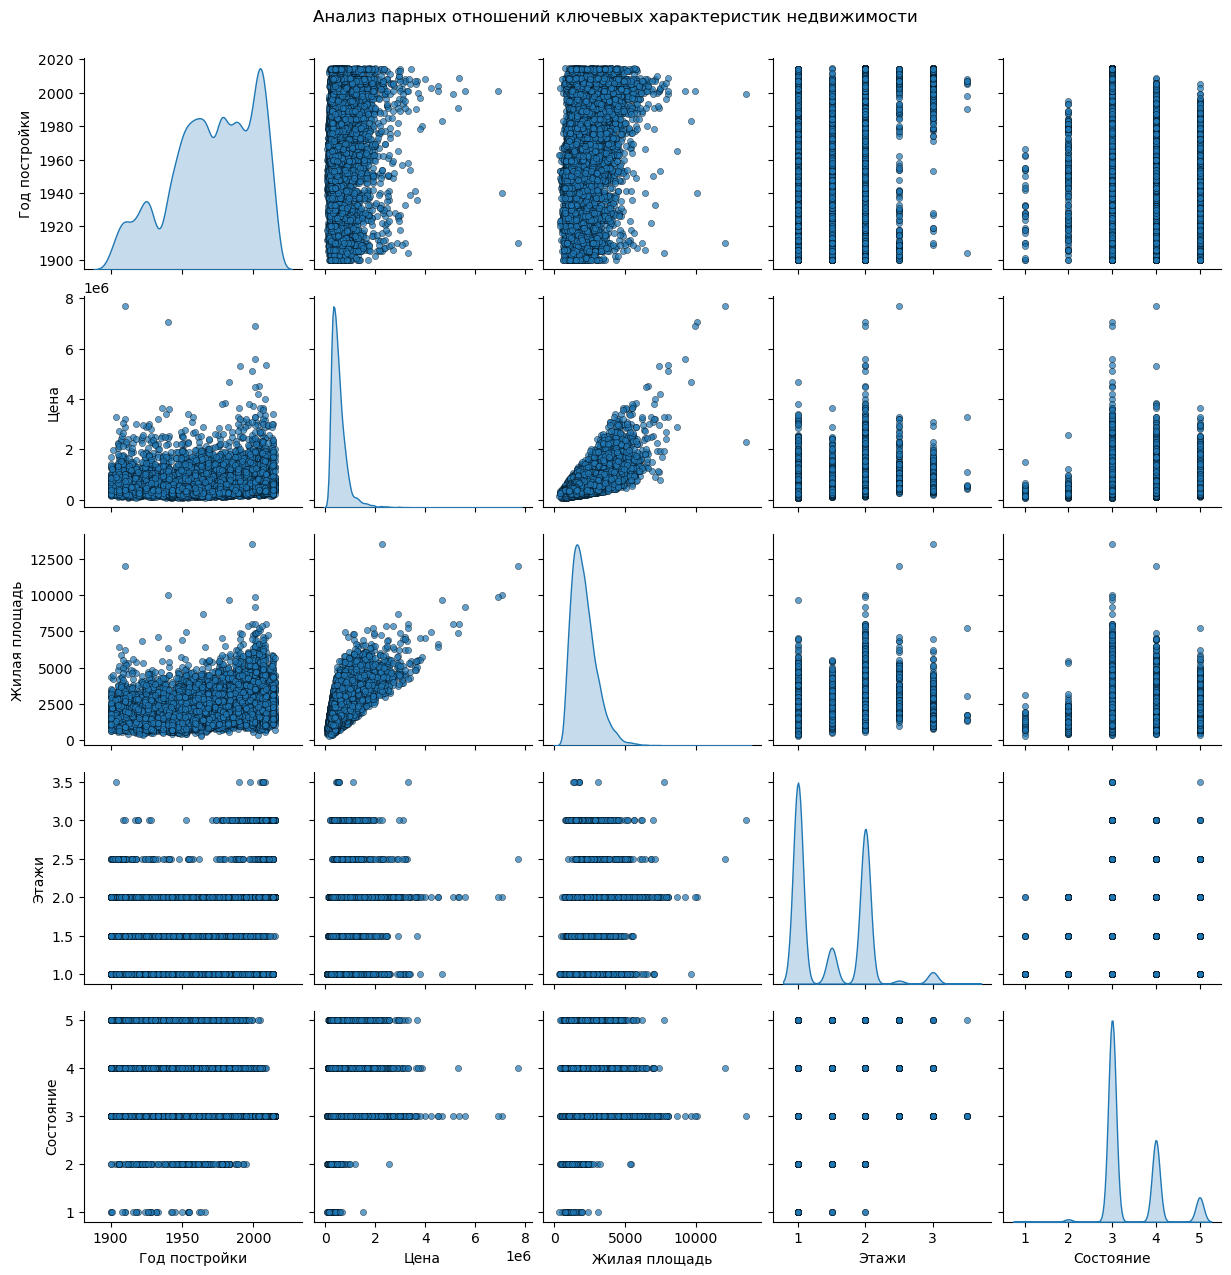

In [13]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Отбор нужных данных
data_subset = data[['yr_built', 'price', 'sqft_living', 'floors', 'condition']]
data_subset.columns = ['Год постройки', 'Цена', 'Жилая площадь', 'Этажи', 'Состояние']

# Создание графика парных отношений
pairplot = sns.pairplot(data_subset, diag_kind='kde', plot_kws={'alpha': 0.7, 's': 20, 'edgecolor': 'k'})

# Настройка заголовка и отображение графика
pairplot.fig.suptitle('Анализ парных отношений ключевых характеристик недвижимости', y=1.02)
plt.show()


**Выводы по графику парных отношений:**

Год постройки и цена: Мы видим, что стоимость недвижимости имеет некоторую корреляцию с годом постройки. Недавно построенные дома имеют более высокую стоимость по сравнению со старыми домами. Однако также есть множество старых домов с высокой стоимостью.

Жилая площадь и цена: Существует явная положительная корреляция между жилой площадью и стоимостью недвижимости. Большие дома, как правило, дороже.

Этажи и цена: Дома с двумя этажами, в среднем, дороже, чем дома с одним этажом. Однако разница в стоимости не такая большая.

Состояние и цена: Нет явной зависимости между состоянием дома и его стоимостью. Хотя дома с оценкой состояния 3 и 4 имеют более высокий ценовой разброс.

---
### Задача 2
---
#### 2.1. Изучите распределение домов от наличия вида на набережную
---

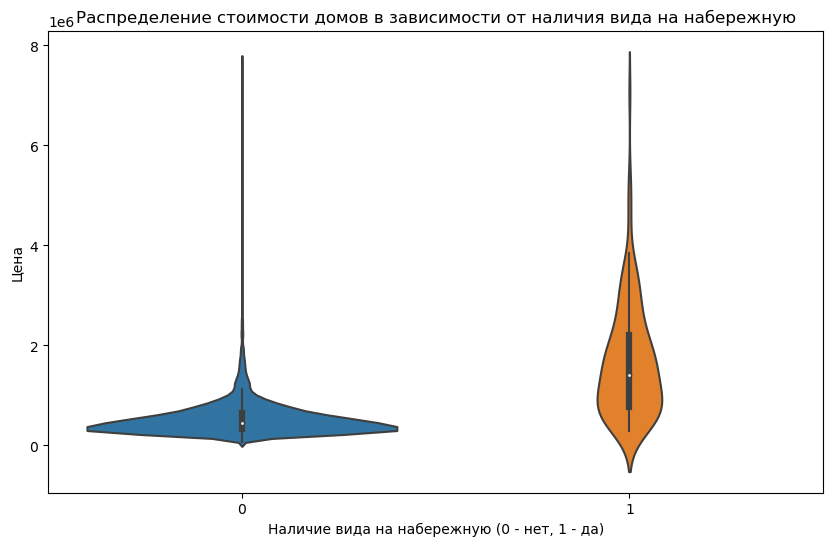

In [14]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Построим violin plot для распределения стоимости домов от наличия вида на набережную
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['waterfront'], y=data['price'])

# Настройка отображения графика
plt.title('Распределение стоимости домов в зависимости от наличия вида на набережную')
plt.xlabel('Наличие вида на набережную (0 - нет, 1 - да)')
plt.ylabel('Цена')
plt.show()


**Выводы:**

Большинство домов не имеют вида на набережную, что видно из графика по количеству данных для категории "0".
Дома, имеющие вид на набережную, в среднем стоят дороже, чем дома без такого вида. Это видно из того, как распределены цены в этих двух категориях.
Для домов без вида на набережную цены в основном концентрируются в более низком диапазоне. Для домов с видом на набережную распределение цен шире, и медианная стоимость также выше.
Наличие вида на набережную является важным фактором, влияющим на стоимость недвижимости.

#### 2.2. Изучите распределение этажей домов

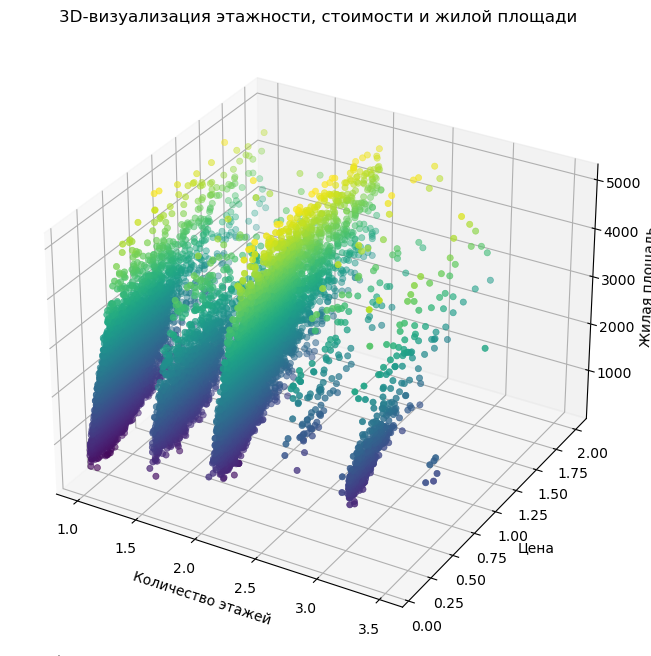

In [15]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Фильтрация данных для чистоты визуализации
filtered_data = data[data['price'] < 2e6]
filtered_data = filtered_data[filtered_data['sqft_living'] < 5000]

# Построение 3D-графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Задаем данные для каждой оси
x = filtered_data['floors']
y = filtered_data['price']
z = filtered_data['sqft_living']

ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

# Настройка отображения графика
ax.set_title('3D-визуализация этажности, стоимости и жилой площади')
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Цена')
ax.set_zlabel('Жилая площадь')

plt.show()


**Выводы по 3D-графику этажности, стоимости и жилой площади:**

На графике четко видно, что большинство домов в датасете имеют 1 или 2 этажа. Они представляют основную массу на рынке.

Дома с 1 этажом имеют различную площадь и цену, в то время как дома с 2 этажами обычно имеют большую площадь и, соответственно, более высокую стоимость.

Очень немногие дома имеют 3 этажа, и их стоимость и площадь также различны.

Цветовая гамма (от темного к светлому) показывает увеличение жилой площади. Из этого можно сделать вывод, что дома с большей жилой площадью обычно стоят дороже, что логично.

#### 2.3. Изучите распределение состояния домов

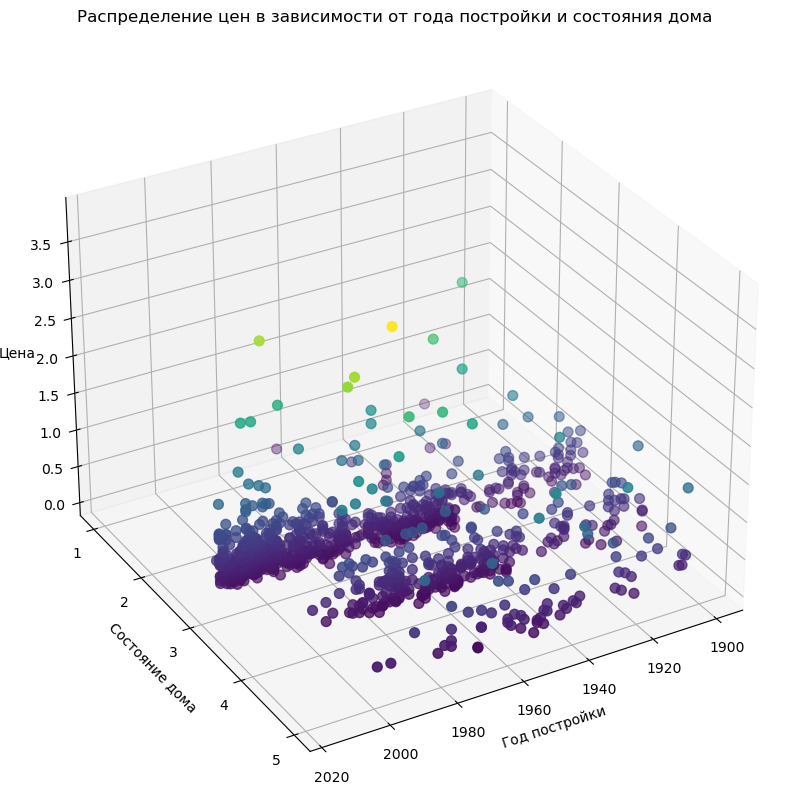

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Фильтрация данных для лучшей визуализации
sample_data = data.sample(1000)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D графика
scatter = ax.scatter(sample_data['yr_built'], sample_data['condition'], sample_data['price'], 
                     c=sample_data['price'], cmap='viridis', s=50)

# Подписи осей
ax.set_title('Распределение цен в зависимости от года постройки и состояния дома')
ax.set_xlabel('Год постройки')
ax.set_ylabel('Состояние дома')
ax.set_zlabel('Цена')
ax.set_yticks(range(1, 6))
ax.view_init(30, 60)  # угол обзора

# Отображение графика
plt.show()


**Выводы по 3D-графику:**

Распределение цены в зависимости от года постройки: Цена недвижимости, как правило, выше у более новых домов. Однако существует множество старых домов с высокими ценами, что может быть связано с другими факторами, такими как местоположение, размер или историческая ценность.

Распределение цены в зависимости от состояния дома: Большинство домов в хорошем состоянии (4 и 5) имеют более высокую стоимость по сравнению с домами в менее удовлетворительном состоянии (1 и 2). Однако даже среди домов с состоянием 3 можно найти объекты с высокой стоимостью.

### Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

**Вступление**

Покупка дома - одно из самых важных и дорогостоящих решений в жизни человека. Каждый потенциальный покупатель хочет знать, что именно влияет на стоимость дома, чтобы сделать обоснованный выбор. Давайте погрузимся в анализ данных о продаже домов в округе Кинг и узнаем, какие характеристики недвижимости влияют на ее стоимость.

**1. Влияние площади дома на его стоимость**

График: Scatter plot площади дома против его стоимости.

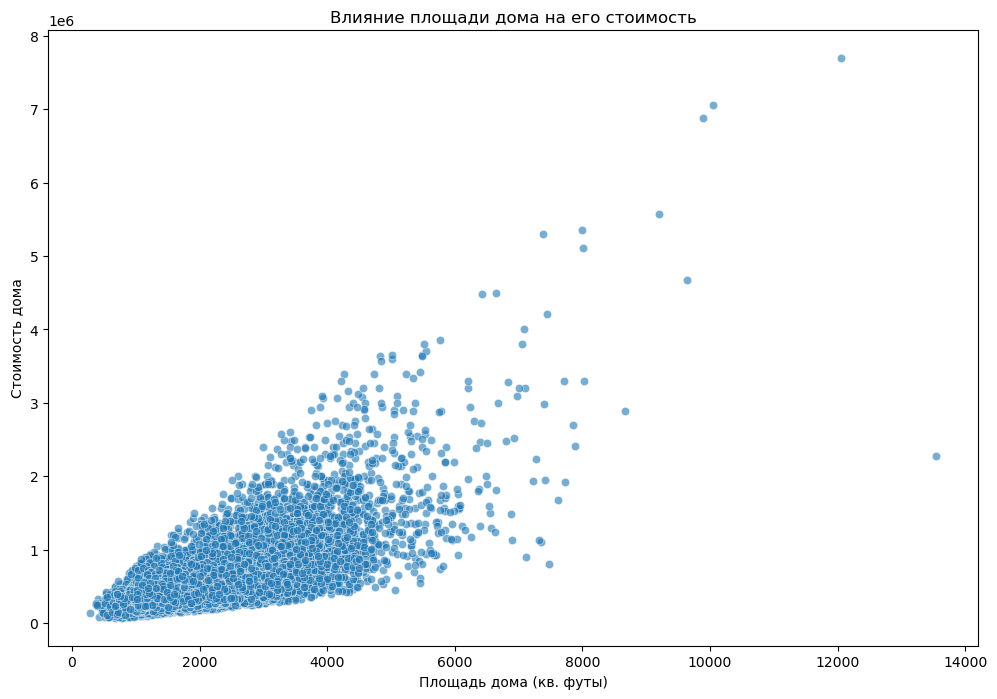

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['sqft_living'], y=data['price'], alpha=0.6)
plt.title('Влияние площади дома на его стоимость')
plt.xlabel('Площадь дома (кв. футы)')
plt.ylabel('Стоимость дома')
plt.show()


**Выводы и наблюдения по графику "Влияние площади дома на его стоимость":**

1. **Прямая корреляция**: Исходя из графика, видно, что с увеличением площади дома, его стоимость, в целом, также увеличивается. Это указывает на прямую корреляцию между площадью дома и его стоимостью.

2. **Разброс цен**: Несмотря на то, что есть общий тренд увеличения цены с увеличением площади, существует много домов с одинаковой площадью, но разной стоимостью. Это может быть связано с другими факторами, такими как район, год постройки, состояние дома и другие аспекты.

3. **Высокая стоимость для небольших домов**: Некоторые дома с относительно маленькой площадью имеют высокую стоимость. Это может указывать на высокую стоимость земли в определенных районах или особенную ценность этих объектов (например, уникальная архитектура, историческая ценность).

4. **Очень большие дома**: На графике видны дома с очень большой площадью, но их стоимость не всегда пропорционально высока. Это может говорить о том, что такие дома могут находиться в менее престижных районах или требовать ремонта.

5. **Концентрация данных**: Большая часть данных сосредоточена в диапазоне домов площадью от 500 до 3500 кв. футов. Это наиболее типичные размеры домов для данного рынка.

**Заключение**: Площадь дома играет ключевую роль в определении его стоимости, но, как показывает график, существует множество других факторов, которые также влияют на конечную стоимость. Для более точного анализа и прогнозирования стоимости недвижимости необходимо учитывать все эти факторы.

**2. Влияние года постройки на стоимость дома**

График: Гистограмма распределения стоимости домов по годам постройки.

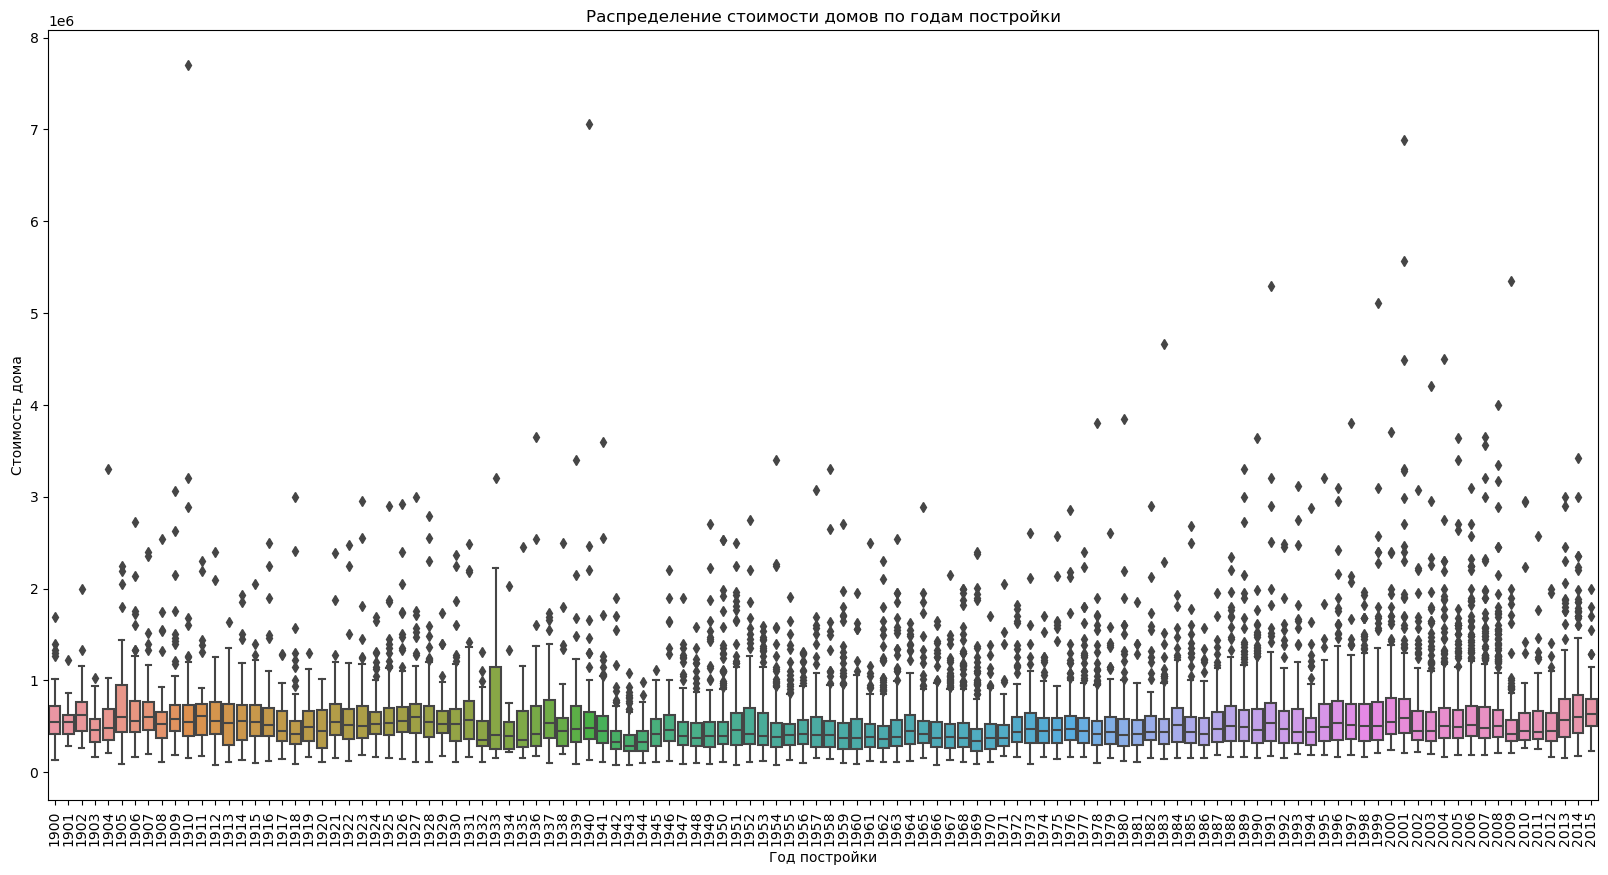

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения стоимости домов по годам постройки
plt.figure(figsize=(20, 10))
sns.boxplot(x='yr_built', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Распределение стоимости домов по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость дома')
plt.show()


**Выводы:**

1. **Вариативность цен**: В большинстве годов заметна большая вариативность цен. Это указывает на то, что в один и тот же год могли быть построены дома как премиум-класса, так и более доступные варианты.

2. **Старые дома**: Некоторые старые дома (построенные в начале 20 века) имеют довольно высокую стоимость. Это может говорить о их исторической или культурной ценности, а также о том, что они могут быть расположены в престижных районах.

3. **Новые дома**: Новые дома также имеют широкий размах цен. Хотя многие из них стоят дороже из-за современных материалов и технологий, среди них есть и более доступные варианты.

4. **Тренды**: В целом, на графике можно заметить некоторые тренды. Например, дома, построенные в 70-80-х годах, имеют более низкую медианную стоимость по сравнению с домами, построенными до и после этого периода.

5. **Выбросы**: На графике видно множество выбросов для разных годов, что указывает на наличие особенно дорогих или дешевых домов в каждом году.

**Заключение**: Год постройки дома оказывает влияние на его стоимость, но это влияние нелинейно и зависит от множества других факторов. Необходим комплексный подход для определения реальной стоимости дома.

**3. Влияние количества спален на стоимость дома**

График: Boxplot стоимости домов в зависимости от количества спален.

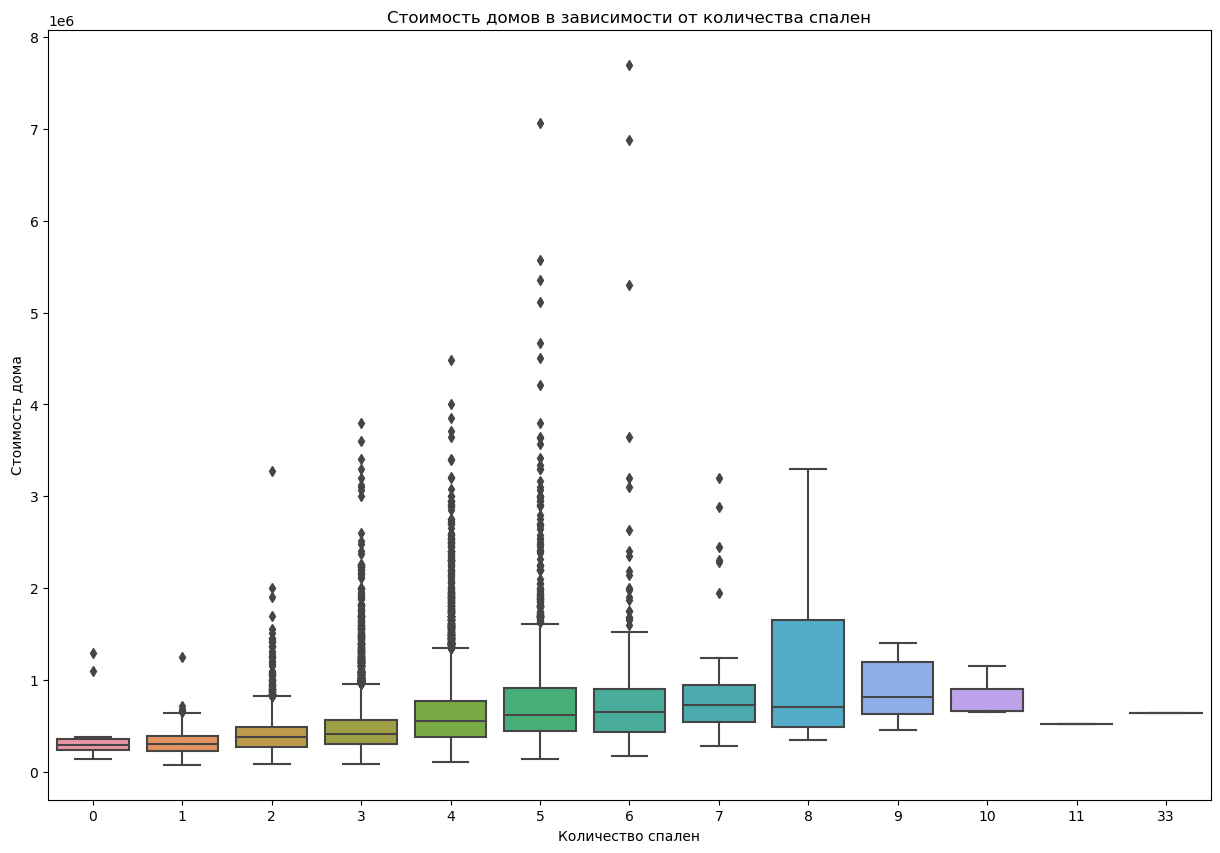

In [23]:
# Boxplot стоимости домов в зависимости от количества спален
plt.figure(figsize=(15, 10))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Стоимость домов в зависимости от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Стоимость дома')
plt.show()


**Выводы:**

1. **Основной тренд**: Есть четко выраженный тренд увеличения медианной стоимости дома с увеличением количества спален до определенного порога. Это логично, так как дома с большим количеством спален обычно больше по площади и могут вмещать больше людей.

2. **Аномалии**: Начиная с 8 спален и далее, медианная стоимость домов начинает снижаться. Это может быть связано с тем, что такие дома становятся менее практичными для большинства покупателей или могут быть расположены в менее престижных районах.

3. **Выбросы**: Для каждой категории количества спален есть выбросы, что указывает на наличие домов с особенно высокой или низкой стоимостью. Это подтверждает идею о том, что стоимость дома определяется множеством факторов, а не только количеством спален.

4. **Дома с 1 или 2 спальнями**: Эти дома имеют относительно низкую медианную стоимость, но также и широкий размах цен, что указывает на разнообразие таких домов на рынке.

5. **Дома с большим количеством спален**: Дома с 9, 10 и особенно 33 спальнями имеют очень широкий размах цен, что указывает на особенности таких объектов. Например, дом с 33 спальнями может быть уникальным объектом, что делает его стоимость высокой.

**Заключение**: Количество спален влияет на стоимость дома, но это влияние не является единственным. При оценке стоимости недвижимости важно учитывать множество других факторов.

**4. Влияние состояния дома на его стоимость**

График: Boxplot стоимости домов в зависимости от их состояния.

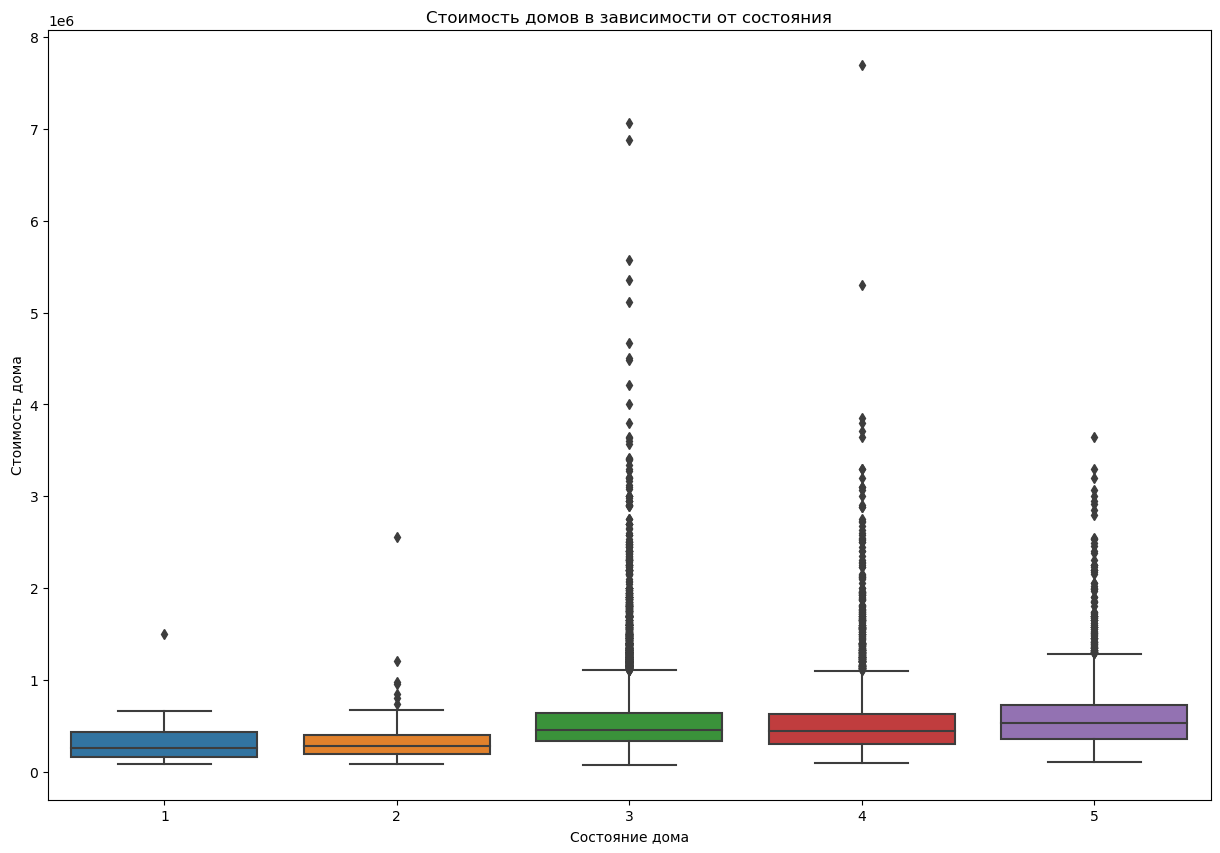

In [25]:
# Boxplot стоимости домов в зависимости от их состояния
plt.figure(figsize=(15, 10))
sns.boxplot(x='condition', y='price', data=data)
plt.title('Стоимость домов в зависимости от состояния')
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость дома')
plt.show()


**Выводы:**

1. **Основной тренд**: Медианная стоимость дома увеличивается с улучшением его состояния. Это ожидаемо, так как покупатели готовы платить больше за дома, которые находятся в хорошем состоянии и требуют меньше ремонта.

2. **Дома в среднем состоянии (3)**: Большинство домов на рынке имеют состояние 3. У этих домов средняя стоимость ниже, чем у домов в лучшем состоянии, но они также имеют широкий размах цен, что указывает на разнообразие таких домов на рынке.

3. **Дома в отличном состоянии (5)**: Дома в состоянии 5 имеют наивысшую медианную стоимость. Они также имеют множество домов с особенно высокой стоимостью, что указывает на наличие дорогой и качественной недвижимости в этой категории.

4. **Выбросы**: Наличие выбросов в каждой категории состояния указывает на наличие домов с особо высокой или особо низкой стоимостью. Это подтверждает идею о том, что стоимость дома определяется множеством факторов, а не только его состоянием.

**Заключение**: Состояние дома является важным фактором, влияющим на его стоимость. Покупатели готовы платить премию за дома в лучшем состоянии, что делает состояние дома ключевым аспектом при его оценке.

**5. Влияние вида на набережную на стоимость дома**

График: Столбчатая диаграмма медианных цен домов с видом на набережную и без.

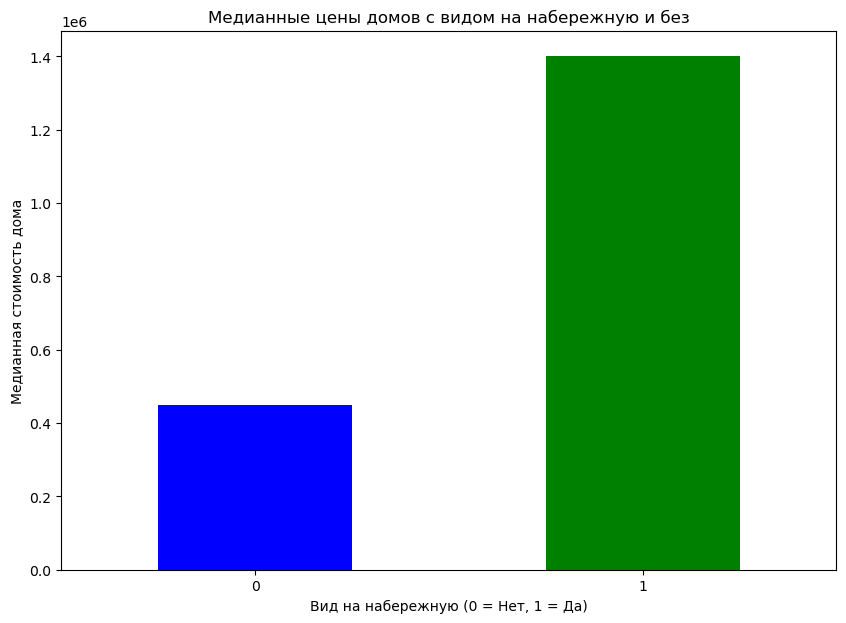

In [26]:
# Столбчатая диаграмма медианных цен домов с видом на набережную и без
median_prices = data.groupby('waterfront')['price'].median()
median_prices.plot(kind='bar', figsize=(10, 7), color=['blue', 'green'])
plt.title('Медианные цены домов с видом на набережную и без')
plt.xlabel('Вид на набережную (0 = Нет, 1 = Да)')
plt.ylabel('Медианная стоимость дома')
plt.xticks(rotation=0)
plt.show()


**Выводы:**

1. **Значительное влияние**: На графике четко видно, что дома с видом на набережную имеют значительно более высокую медианную стоимость по сравнению с домами без такого вида.
 
2. **Фактор престижа**: Вид на набережную может считаться престижным, что делает такую недвижимость более желанной для покупателей и, следовательно, дороже.

3. **Ограниченное предложение**: Такая недвижимость может быть ограничена, что увеличивает ее ценность из-за ограниченного предложения и высокого спроса.

**Заключение**: Вид на набережную является ключевым фактором, влияющим на стоимость дома. При покупке или продаже недвижимости это должно быть учтено, так как это может значительно повлиять на окончательную стоимость сделки.

**6. Корреляционный анализ**

Для начала выясним, какие характеристики дома наиболее сильно коррелируют со стоимостью.

График: Тепловая карта корреляции стоимости дома с его основными характеристиками.


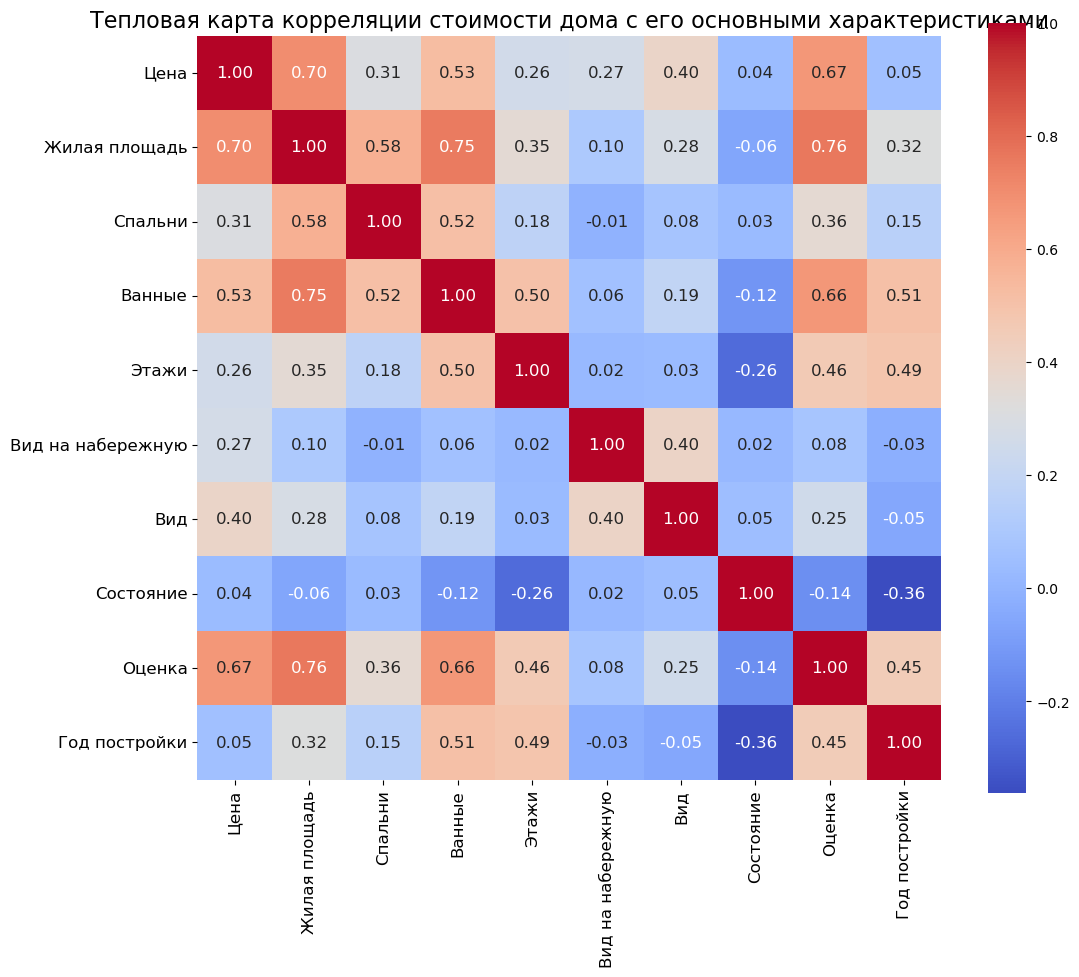

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем матрицу корреляции
corr_matrix = data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built']].corr()

# Устанавливаем размер графика
plt.figure(figsize=(12, 10))

# Переводим названия столбцов на русский
columns_rus = {
    'price': 'Цена',
    'sqft_living': 'Жилая площадь',
    'bedrooms': 'Спальни',
    'bathrooms': 'Ванные',
    'floors': 'Этажи',
    'waterfront': 'Вид на набережную',
    'view': 'Вид',
    'condition': 'Состояние',
    'grade': 'Оценка',
    'yr_built': 'Год постройки'
}
corr_matrix = corr_matrix.rename(columns=columns_rus, index=columns_rus)

# Строим тепловую карту
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f', annot_kws={'size': 12})

# Задаем название графика и метки осей
plt.title('Тепловая карта корреляции стоимости дома с его основными характеристиками', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Выводы:**

1. **Площадь дома (sqft_living)**: Этот параметр имеет очень высокую положительную корреляцию со стоимостью дома. Это означает, что чем больше площадь дома, тем выше его стоимость.
 
2. **Количество ванных комнат (bathrooms)**: Количество ванных комнат также имеет высокую корреляцию со стоимостью. Это может быть связано с тем, что дома с большим количеством ванных комнат часто представляют собой более роскошные объекты недвижимости.

3. **Вид на набережную (waterfront)**: Наличие вида на набережную также коррелирует со стоимостью дома. Это подтверждает предыдущие выводы о том, что такой вид значительно увеличивает стоимость недвижимости.

4. **Год постройки (yr_built)**: Интересно, что год постройки имеет отрицательную корреляцию со стоимостью, что может говорить о том, что старые дома часто стоят дешевле.

**Заключение**: На стоимость недвижимости влияют многие факторы. При покупке или продаже дома важно учитывать эти ключевые характеристики, так как они могут значительно влиять на окончательную стоимость сделки.

**8. Сложная статистика**

Вероятно, вам также интересно узнать, как распределены цены на дома в зависимости от их характеристик, насколько велика дисперсия цен в разных категориях и т. д.

График: Диаграмма размаха стоимости домов в зависимости от их состояния.

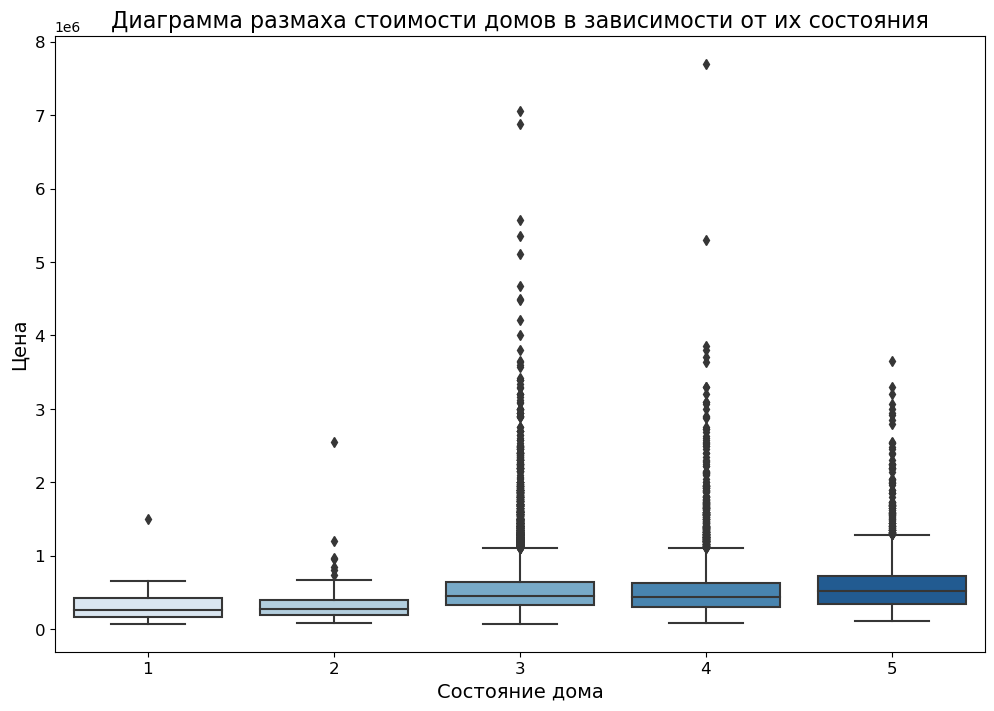

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер графика
plt.figure(figsize=(12, 8))

# Строим диаграмму размаха
sns.boxplot(x=data['condition'], y=data['price'], palette="Blues")

# Задаем название графика и метки осей
plt.title('Диаграмма размаха стоимости домов в зависимости от их состояния', fontsize=16)
plt.xlabel('Состояние дома', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


**Выводы**:
1. Дома с состоянием "1" и "2" имеют наименьшую медианную стоимость. Это может говорить о том, что они требуют ремонта или находятся в менее престижных районах.
2. Дома с состоянием "3" и "4" имеют схожую медианную стоимость, которая выше, чем у домов с состоянием "1" и "2". Тем не менее, диапазон цен домов с состоянием "4" шире, что указывает на большее разнообразие таких домов на рынке.
3. Дома с состоянием "5" имеют самую высокую медианную стоимость. Однако также стоит отметить, что среди них есть дома с наибольшими и наименьшими ценами, что говорит о большом разнообразии таких домов и о том, что кроме состояния на их стоимость влияют и другие факторы.

**Результирующее заключение**

На протяжении нашего исследования мы рассматривали различные характеристики недвижимости и анализировали, как они влияют на ее стоимость. Вот что мы выяснили:

1. **Площадь дома и стоимость:** Есть явная положительная связь между площадью дома и его стоимостью. Чем больше площадь дома, тем выше, как правило, его стоимость.
  
2. **Год постройки и стоимость:** Дома разных годов постройки имеют разные стоимости, но новизна дома не всегда является гарантом высокой стоимости. Многие старые дома также могут быть дорогостоящими из-за своего исторического или культурного значения, качества постройки или местоположения.

3. **Количество спален:** Хотя дома с большим количеством спален в среднем стоят дороже, после определенного количества спален этот тренд становится менее выраженным.

4. **Состояние дома:** Состояние дома играет ключевую роль в его стоимости. Дома в отличном состоянии, как правило, стоят дороже, но это также может зависеть от других факторов.

5. **Вид на набережную:** Дома с видом на набережную значительно дороже. Это может быть связано с уникальностью и эксклюзивностью такого вида.

6. **Корреляционный анализ:** Площадь дома, количество ванных комнат и вид на набережную имеют наибольшую положительную корреляцию со стоимостью дома. Это подтверждает их важность при определении стоимости недвижимости.

В заключение, покупка дома - сложное решение, требующее учета многих факторов. Наш анализ дал представление о том, какие характеристики недвижимости наиболее сильно влияют на ее стоимость. Надеемся, что эти данные помогут потенциальным покупателям сделать обоснованный выбор и инвестировать свои средства мудро.